In [1]:
import tensorflow as tf

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns 

In [3]:
df = pd.read_csv("/kaggle/input/utk-faces-v2/utkfaces.csv")

In [4]:
df

,age,sex,ethnicity,pixels
0,16,1,3,20 17 14 10 9 10 11 13 11 11 11 11 11 11 11 11...
1,40,1,0,181 179 178 176 176 178 180 182 184 187 188 18...
2,71,1,0,235 235 234 233 230 226 222 219 218 219 221 22...
3,80,1,0,142 144 151 159 160 154 149 148 154 159 161 15...
4,21,0,4,24 25 26 25 24 25 27 29 29 31 34 36 37 40 45 4...
...,...,...,...,...
9773,53,0,0,126 129 133 137 141 147 153 158 164 166 167 16...
9774,36,0,0,146 146 146 148 151 156 160 163 168 170 172 17...
9775,1,0,2,56 59 62 67 72 79 87 92 100 113 125 132 136 14...
9776,3,1,4,71 71 72 75 79 85 90 93 97 96 94 92 88 84 81 7...


In [4]:
df['pixels']=df['pixels'].apply(lambda x:  np.array(x.split(), dtype="float32"))

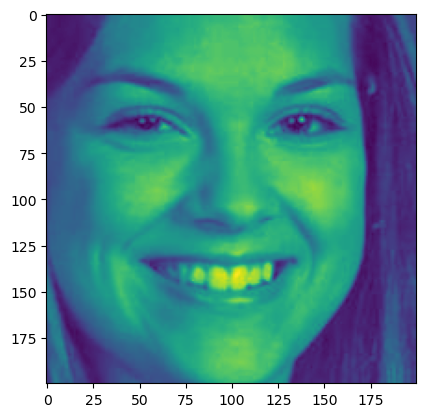

In [5]:
x = np.array(df['pixels'].tolist())
x = x.reshape(x.shape[0],200,200,1)

plt.imshow(x[2000])

<Axes: xlabel='ethnicity', ylabel='Count'>

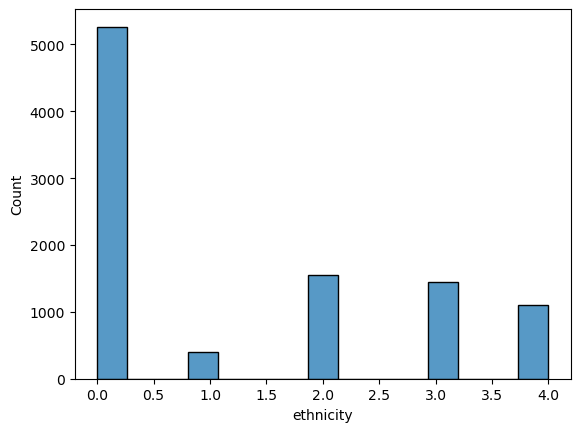

In [7]:
sns.histplot(data=df,x="ethnicity")

<Axes: xlabel='age', ylabel='Count'>

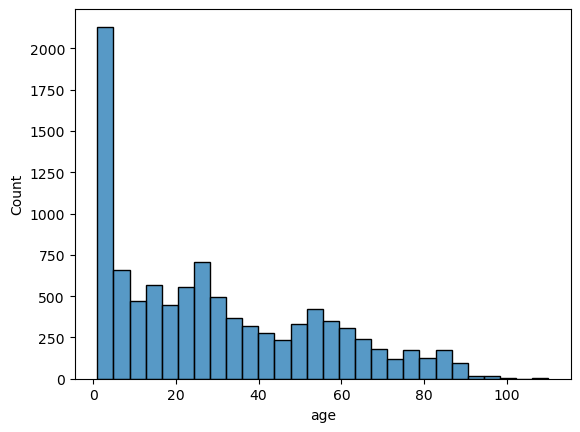

In [8]:
sns.histplot(data=df,x="age")

<Axes: xlabel='sex', ylabel='Count'>

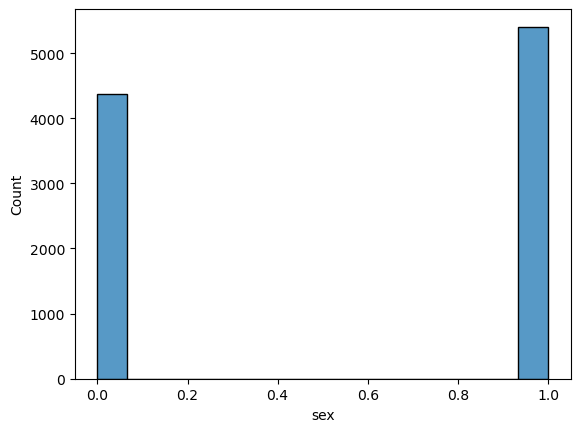

In [9]:
sns.histplot(data=df,x="sex")

In [6]:
x=x/255

Gender

In [8]:
y = df['sex']

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [13]:
x_train[0]

array([[[0.2509804 ],
        [0.23921569],
        [0.23529412],
        ...,
        [0.15686275],
        [0.15686275],
        [0.15686275]],

       [[0.23921569],
        [0.23137255],
        [0.23137255],
        ...,
        [0.15686275],
        [0.15686275],
        [0.15294118]],

       [[0.22745098],
        [0.22352941],
        [0.22745098],
        ...,
        [0.16078432],
        [0.15294118],
        [0.14901961]],

       ...,

       [[0.44705883],
        [0.3372549 ],
        [0.27450982],
        ...,
        [0.31764707],
        [0.29411766],
        [0.28627452]],

       [[0.35686275],
        [0.27058825],
        [0.2627451 ],
        ...,
        [0.29411766],
        [0.2901961 ],
        [0.29803923]],

       [[0.29411766],
        [0.23921569],
        [0.28235295],
        ...,
        [0.28235295],
        [0.28627452],
        [0.30588236]]], dtype=float32)

In [14]:
y_train

7552    0
5167    1
6616    0
4281    1
9683    0
       ..
3762    0
4813    0
4712    1
3958    0
2439    1
Name: sex, Length: 7822, dtype: int64

In [15]:
model_gender_1 = tf.keras.Sequential()
model_gender_1.add(tf.keras.layers.Flatten(input_shape=(200, 200)))
model_gender_1.add(tf.keras.layers.Dense(64,activation="relu"))
model_gender_1.add(tf.keras.layers.Dense(64,activation="relu"))
model_gender_1.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model_gender_1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [16]:
epochs = 20
history_gender_1=model_gender_1.fit(x_train, y_train,batch_size=32, epochs=epochs,validation_data=(x_test, y_test))

Epoch 1/20
245/245 [==============================] - 7s 11ms/step - loss: 0.8265 - accuracy: 0.6257 - val_loss: 0.5397 - val_accuracy: 0.7019
Epoch 2/20
245/245 [==============================] - 2s 7ms/step - loss: 0.5809 - accuracy: 0.6969 - val_loss: 0.5238 - val_accuracy: 0.7342
Epoch 3/20
245/245 [==============================] - 2s 7ms/step - loss: 0.6362 - accuracy: 0.6821 - val_loss: 0.4979 - val_accuracy: 0.7485
Epoch 4/20
245/245 [==============================] - 2s 7ms/step - loss: 0.5491 - accuracy: 0.7260 - val_loss: 0.4895 - val_accuracy: 0.7556
Epoch 5/20
245/245 [==============================] - 2s 7ms/step - loss: 0.5370 - accuracy: 0.7288 - val_loss: 0.5931 - val_accuracy: 0.6851
Epoch 6/20
245/245 [==============================] - 2s 7ms/step - loss: 0.5130 - accuracy: 0.7434 - val_loss: 0.4666 - val_accuracy: 0.7710
Epoch 7/20
245/245 [==============================] - 2s 7ms/step - loss: 0.4929 - accuracy: 0.7539 - val_loss: 0.5023 - val_accuracy: 0.7454
Epoch

In [14]:
def plot_figs(epochs,hist):
    fig, ax = plt.subplots(1,2,figsize=(12,5))
    values = ["accuracy","loss"]
    for i in range(2):
        ax[i].plot(range(epochs),hist.history[values[i]],label=values[i])
        ax[i].plot(range(epochs),hist.history['val_'+values[i]],label='val_'+values[i])
        ax[i].set_ylabel(values[i])
        ax[i].set_xlabel("epochs")
        ax[i].set_title(values[i]+" evolution")
        ax[i].legend()
    plt.show()

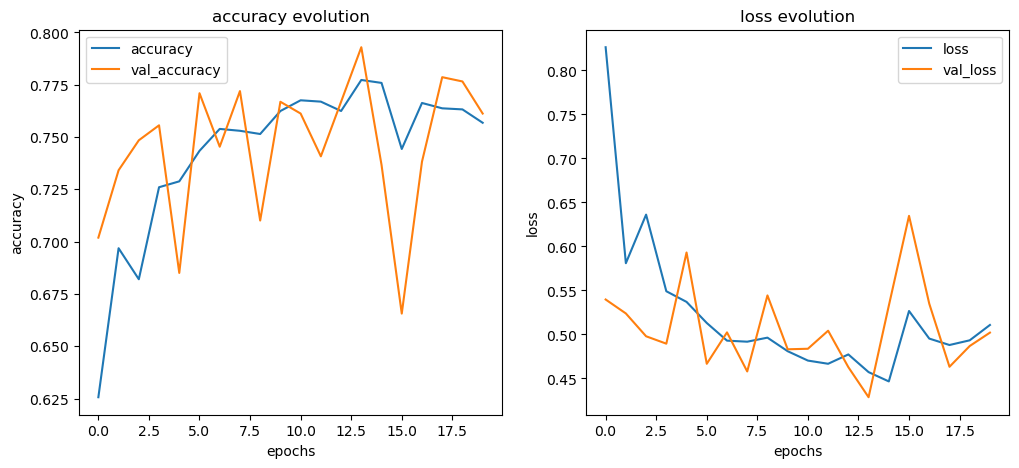

In [18]:
plot_figs(epochs,history_gender_1)

In [19]:
model_gender_2 = tf.keras.Sequential()
model_gender_2.add(tf.keras.layers.Flatten(input_shape=(200, 200)))
model_gender_2.add(tf.keras.layers.Dense(128,activation="relu"))
model_gender_2.add(tf.keras.layers.Dense(64,activation="relu"))
model_gender_2.add(tf.keras.layers.Dense(64,activation="relu"))
model_gender_2.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model_gender_2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [20]:
history_gender_2=model_gender_2.fit(x_train, y_train,batch_size=32, epochs=epochs,validation_data=(x_test, y_test))

Epoch 1/20
245/245 [==============================] - 4s 11ms/step - loss: 0.7241 - accuracy: 0.6326 - val_loss: 0.5643 - val_accuracy: 0.6820
Epoch 2/20
245/245 [==============================] - 2s 7ms/step - loss: 0.5791 - accuracy: 0.6961 - val_loss: 0.5081 - val_accuracy: 0.7321
Epoch 3/20
245/245 [==============================] - 2s 7ms/step - loss: 0.5498 - accuracy: 0.7155 - val_loss: 0.7871 - val_accuracy: 0.6462
Epoch 4/20
245/245 [==============================] - 2s 7ms/step - loss: 0.5902 - accuracy: 0.6812 - val_loss: 0.6013 - val_accuracy: 0.7081
Epoch 5/20
245/245 [==============================] - 2s 9ms/step - loss: 0.5384 - accuracy: 0.7200 - val_loss: 0.5732 - val_accuracy: 0.7035
Epoch 6/20
245/245 [==============================] - 2s 7ms/step - loss: 0.4963 - accuracy: 0.7452 - val_loss: 0.5804 - val_accuracy: 0.6462
Epoch 7/20
245/245 [==============================] - 2s 7ms/step - loss: 0.5022 - accuracy: 0.7428 - val_loss: 0.4755 - val_accuracy: 0.7577
Epoch

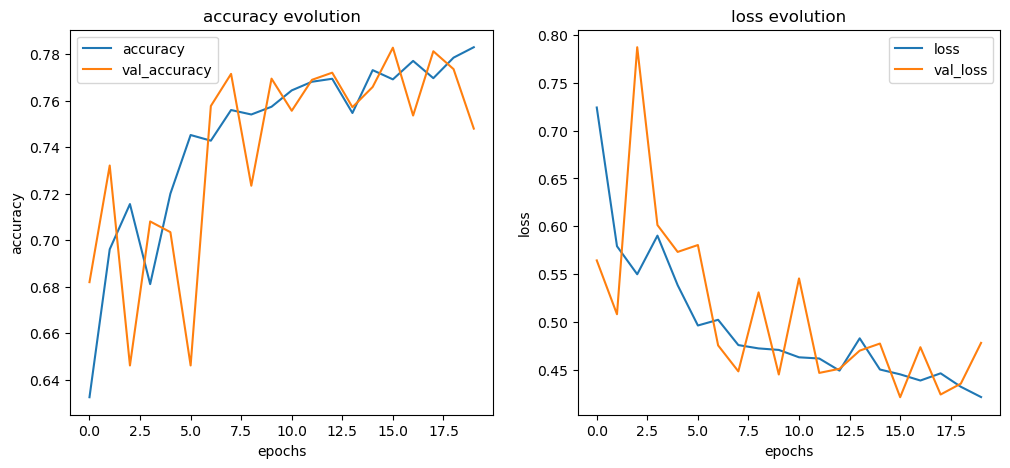

In [21]:
plot_figs(epochs,history_gender_2)

In [22]:
model_gender_3 = tf.keras.Sequential()
model_gender_3.add(tf.keras.layers.Flatten(input_shape=(200, 200)))
model_gender_3.add(tf.keras.layers.Dense(512,activation="relu"))
model_gender_3.add(tf.keras.layers.Dense(256,activation="relu"))
model_gender_3.add(tf.keras.layers.Dense(128,activation="relu"))
model_gender_3.add(tf.keras.layers.Dense(64,activation="relu"))
model_gender_3.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model_gender_3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [23]:
history_gender_3=model_gender_3.fit(x_train, y_train,batch_size=32, epochs=epochs,validation_data=(x_test, y_test))

Epoch 1/20
245/245 [==============================] - 6s 12ms/step - loss: 1.1269 - accuracy: 0.5992 - val_loss: 0.5774 - val_accuracy: 0.6662
Epoch 2/20
245/245 [==============================] - 2s 8ms/step - loss: 0.5921 - accuracy: 0.6837 - val_loss: 0.6078 - val_accuracy: 0.6621
Epoch 3/20
245/245 [==============================] - 2s 8ms/step - loss: 0.5775 - accuracy: 0.6936 - val_loss: 0.5507 - val_accuracy: 0.6861
Epoch 4/20
245/245 [==============================] - 2s 8ms/step - loss: 0.5396 - accuracy: 0.7190 - val_loss: 0.4919 - val_accuracy: 0.7495
Epoch 5/20
245/245 [==============================] - 2s 9ms/step - loss: 0.5409 - accuracy: 0.7148 - val_loss: 0.6049 - val_accuracy: 0.6375
Epoch 6/20
245/245 [==============================] - 2s 8ms/step - loss: 0.5303 - accuracy: 0.7217 - val_loss: 0.5424 - val_accuracy: 0.7035
Epoch 7/20
245/245 [==============================] - 2s 8ms/step - loss: 0.5130 - accuracy: 0.7402 - val_loss: 0.4728 - val_accuracy: 0.7495
Epoch

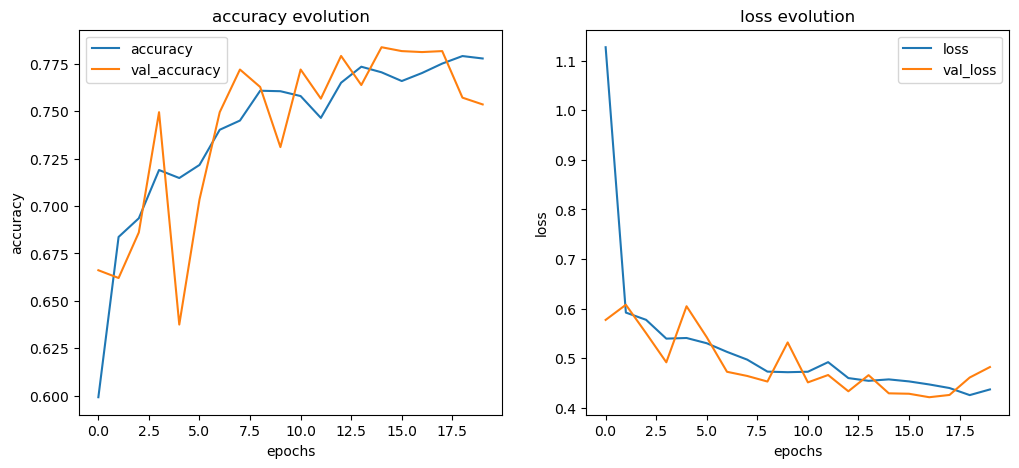

In [24]:
plot_figs(epochs,history_gender_3)

In [25]:
model_gender_4 = tf.keras.Sequential()
model_gender_4.add(tf.keras.layers.Flatten(input_shape=(200, 200)))
model_gender_4.add(tf.keras.layers.Dense(512,activation="relu"))
model_gender_4.add(tf.keras.layers.Dense(256,activation="relu"))
model_gender_4.add(tf.keras.layers.Dense(128,activation="relu"))
model_gender_4.add(tf.keras.layers.Dense(64,activation="relu"))
model_gender_4.add(tf.keras.layers.Dense(32,activation="relu"))
model_gender_4.add(tf.keras.layers.Dropout(0.5))
model_gender_4.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model_gender_4.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [26]:
history_gender_4=model_gender_4.fit(x_train, y_train,batch_size=32, epochs=epochs,validation_data=(x_test, y_test))

Epoch 1/20
245/245 [==============================] - 6s 12ms/step - loss: 0.8721 - accuracy: 0.5260 - val_loss: 0.6890 - val_accuracy: 0.5619
Epoch 2/20
245/245 [==============================] - 2s 9ms/step - loss: 0.6892 - accuracy: 0.5552 - val_loss: 0.6704 - val_accuracy: 0.5706
Epoch 3/20
245/245 [==============================] - 3s 11ms/step - loss: 0.6600 - accuracy: 0.5771 - val_loss: 0.6131 - val_accuracy: 0.6472
Epoch 4/20
245/245 [==============================] - 2s 9ms/step - loss: 0.6599 - accuracy: 0.5690 - val_loss: 0.5909 - val_accuracy: 0.6641
Epoch 5/20
245/245 [==============================] - 2s 9ms/step - loss: 0.6290 - accuracy: 0.6030 - val_loss: 0.5613 - val_accuracy: 0.6933
Epoch 6/20
245/245 [==============================] - 2s 9ms/step - loss: 0.6130 - accuracy: 0.6460 - val_loss: 0.5937 - val_accuracy: 0.6529
Epoch 7/20
245/245 [==============================] - 2s 9ms/step - loss: 0.5918 - accuracy: 0.6749 - val_loss: 0.5550 - val_accuracy: 0.7030
Epoc

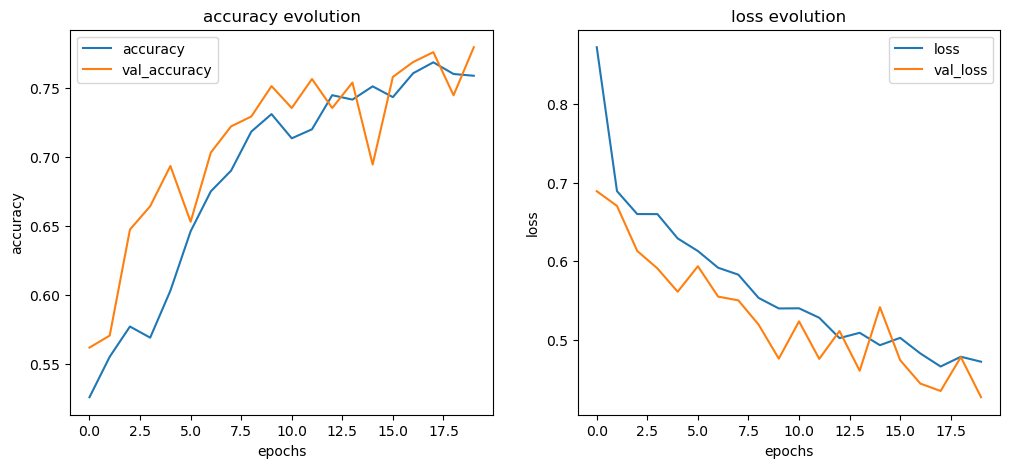

In [27]:
plot_figs(epochs,history_gender_4)

Avant de passer aux CNN on essaie avec plus d'epochs, car jusqu'à présent c'est peu satisfaisant

In [28]:
model_gender_3 = tf.keras.Sequential()
model_gender_3.add(tf.keras.layers.Flatten(input_shape=(200, 200)))
model_gender_3.add(tf.keras.layers.Dense(512,activation="relu"))
model_gender_3.add(tf.keras.layers.Dense(256,activation="relu"))
model_gender_3.add(tf.keras.layers.Dense(128,activation="relu"))
model_gender_3.add(tf.keras.layers.Dense(64,activation="relu"))
model_gender_3.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model_gender_3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [29]:
epochs = 200
history_gender_3=model_gender_3.fit(x_train, y_train,batch_size=32, epochs=epochs,validation_data=(x_test, y_test))

Epoch 1/200
245/245 [==============================] - 5s 12ms/step - loss: 1.1232 - accuracy: 0.6133 - val_loss: 0.6765 - val_accuracy: 0.6447
Epoch 2/200
245/245 [==============================] - 2s 9ms/step - loss: 0.5737 - accuracy: 0.6913 - val_loss: 0.5037 - val_accuracy: 0.7582
Epoch 3/200
245/245 [==============================] - 2s 8ms/step - loss: 0.5523 - accuracy: 0.7186 - val_loss: 0.5034 - val_accuracy: 0.7408
Epoch 4/200
245/245 [==============================] - 2s 8ms/step - loss: 0.5344 - accuracy: 0.7235 - val_loss: 0.5337 - val_accuracy: 0.7163
Epoch 5/200
245/245 [==============================] - 2s 8ms/step - loss: 0.5451 - accuracy: 0.7205 - val_loss: 0.4853 - val_accuracy: 0.7526
Epoch 6/200
245/245 [==============================] - 2s 8ms/step - loss: 0.5205 - accuracy: 0.7286 - val_loss: 0.4783 - val_accuracy: 0.7602
Epoch 7/200
245/245 [==============================] - 2s 8ms/step - loss: 0.5051 - accuracy: 0.7461 - val_loss: 0.4684 - val_accuracy: 0.761

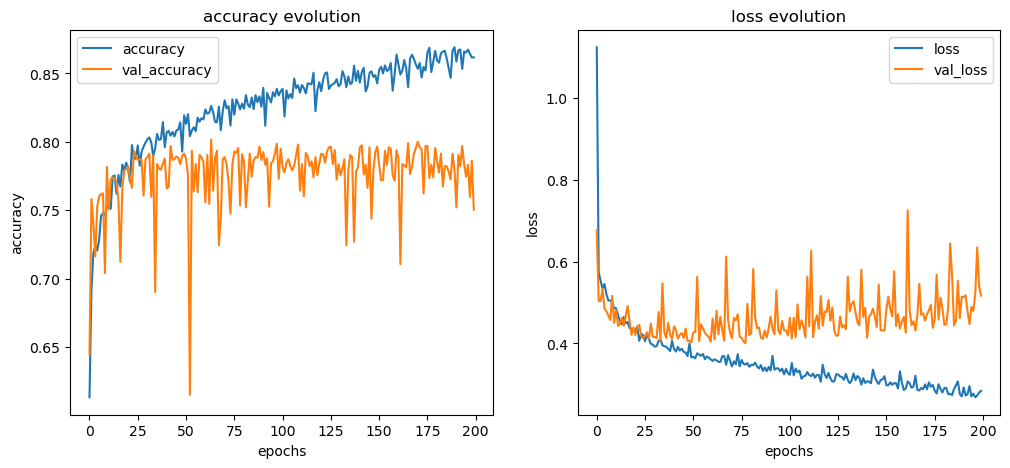

In [30]:
plot_figs(epochs,history_gender_3)

CNN

In [31]:
model_gender_5 = tf.keras.Sequential()
model_gender_5.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 1))) 
model_gender_5.add(tf.keras.layers.MaxPooling2D((2, 2)))
model_gender_5.add(tf.keras.layers.Flatten())
model_gender_5.add(tf.keras.layers.Dense(64, activation='relu'))
model_gender_5.add(tf.keras.layers.Dense(1, activation='sigmoid'))  
model_gender_5.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [32]:
epochs = 20
history_gender_5=model_gender_5.fit(x_train, y_train,batch_size=32, epochs=epochs,validation_data=(x_test, y_test))

Epoch 1/20
245/245 [==============================] - 10s 21ms/step - loss: 0.8825 - accuracy: 0.5355 - val_loss: 0.6902 - val_accuracy: 0.5619
Epoch 2/20
245/245 [==============================] - 4s 17ms/step - loss: 0.6898 - accuracy: 0.5506 - val_loss: 0.6877 - val_accuracy: 0.5619
Epoch 3/20
245/245 [==============================] - 4s 16ms/step - loss: 0.6886 - accuracy: 0.5506 - val_loss: 0.6866 - val_accuracy: 0.5619
Epoch 4/20
245/245 [==============================] - 4s 18ms/step - loss: 0.6882 - accuracy: 0.5506 - val_loss: 0.6861 - val_accuracy: 0.5619
Epoch 5/20
245/245 [==============================] - 4s 16ms/step - loss: 0.6881 - accuracy: 0.5506 - val_loss: 0.6859 - val_accuracy: 0.5619
Epoch 6/20
245/245 [==============================] - 4s 17ms/step - loss: 0.6880 - accuracy: 0.5506 - val_loss: 0.6858 - val_accuracy: 0.5619
Epoch 7/20
245/245 [==============================] - 4s 17ms/step - loss: 0.6881 - accuracy: 0.5506 - val_loss: 0.6857 - val_accuracy: 0.561

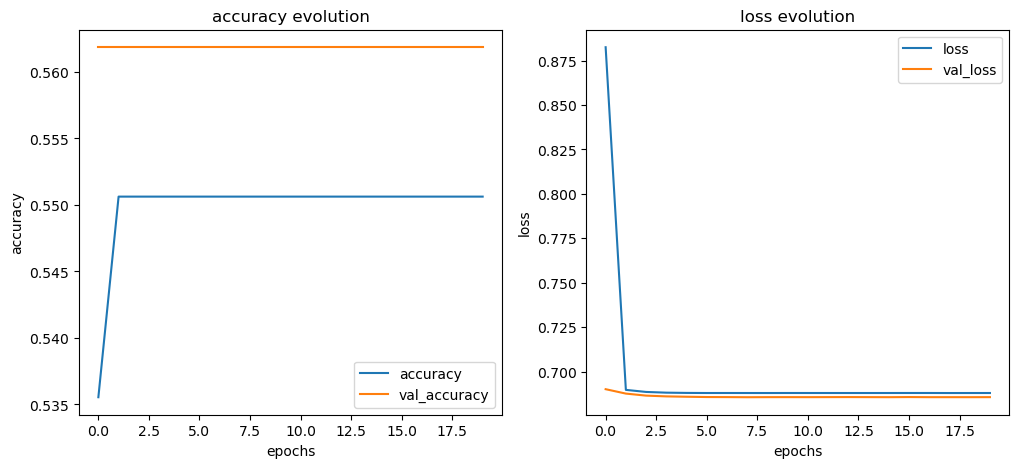

In [33]:
plot_figs(epochs,history_gender_5)

In [10]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.9500):
            print("\nReached 0.9500 accuracy so cancelling training!")
            self.model.stop_training = True
        
callback = myCallback()

In [11]:
model_gender_6 = tf.keras.Sequential()
model_gender_6.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 1)))
model_gender_6.add(tf.keras.layers.MaxPooling2D((2, 2))) 
model_gender_6.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))  
model_gender_6.add(tf.keras.layers.MaxPooling2D((2, 2)))
model_gender_6.add(tf.keras.layers.Flatten())
model_gender_6.add(tf.keras.layers.Dense(128, activation='relu'))
model_gender_6.add(tf.keras.layers.Dropout(0.5))
model_gender_6.add(tf.keras.layers.Dense(1, activation='sigmoid'))  
model_gender_6.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
epochs=20
history_gender_6=model_gender_6.fit(x_train, y_train,batch_size=32, epochs=epochs,validation_data=(x_test, y_test),callbacks=[callback])

Epoch 1/20
245/245 [==============================] - 15s 26ms/step - loss: 0.5915 - accuracy: 0.6941 - val_loss: 0.4786 - val_accuracy: 0.7623
Epoch 2/20
245/245 [==============================] - 5s 22ms/step - loss: 0.4656 - accuracy: 0.7695 - val_loss: 0.4261 - val_accuracy: 0.7848
Epoch 3/20
245/245 [==============================] - 5s 20ms/step - loss: 0.4080 - accuracy: 0.7979 - val_loss: 0.4493 - val_accuracy: 0.7720
Epoch 4/20
245/245 [==============================] - 5s 21ms/step - loss: 0.3515 - accuracy: 0.8350 - val_loss: 0.3742 - val_accuracy: 0.8216
Epoch 5/20
245/245 [==============================] - 5s 21ms/step - loss: 0.3007 - accuracy: 0.8587 - val_loss: 0.3937 - val_accuracy: 0.8144
Epoch 6/20
245/245 [==============================] - 5s 21ms/step - loss: 0.2557 - accuracy: 0.8851 - val_loss: 0.3815 - val_accuracy: 0.8246
Epoch 7/20
245/245 [==============================] - 5s 21ms/step - loss: 0.2266 - accuracy: 0.9039 - val_loss: 0.4131 - val_accuracy: 0.825

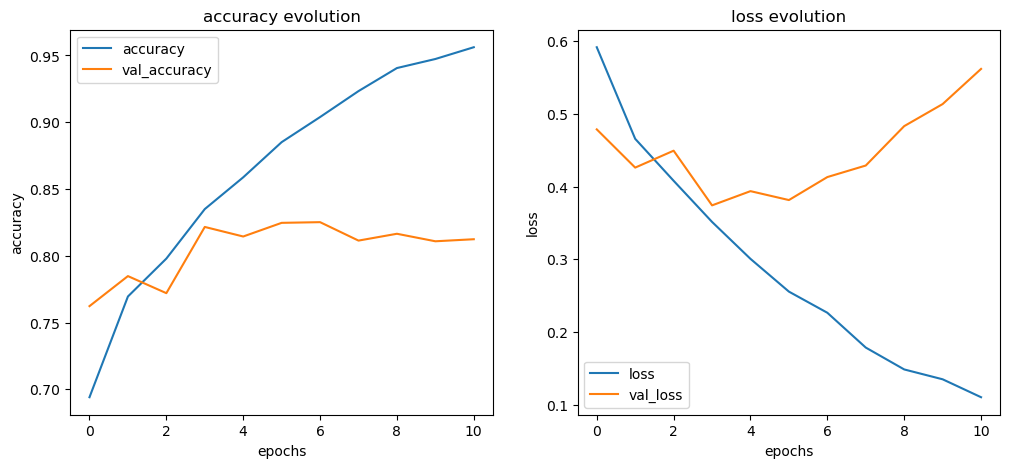

In [16]:
plot_figs(11,history_gender_6)

In [17]:
model_gender_7 = tf.keras.Sequential()
model_gender_7.add(tf.keras.layers.Conv2D(30, (5, 5), strides=(1, 1), activation='relu', input_shape=(200, 200, 1)))
model_gender_7.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2))) 
model_gender_7.add(tf.keras.layers.Conv2D(15, (3, 3), strides=(1, 1), activation='relu'))  
model_gender_7.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_gender_7.add(tf.keras.layers.Dropout(0.3))
model_gender_7.add(tf.keras.layers.Flatten())
model_gender_7.add(tf.keras.layers.Dense(128, activation='relu'))
model_gender_7.add(tf.keras.layers.Dense(50, activation='relu'))
model_gender_7.add(tf.keras.layers.Dense(1, activation='sigmoid'))  
model_gender_7.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
history_gender_7=model_gender_7.fit(x_train, y_train,batch_size=32, epochs=epochs,validation_data=(x_test, y_test),callbacks=[callback])

Epoch 1/20


2023-06-27 12:53:48.896904: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_1/dropout_1/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


245/245 [==============================] - 9s 26ms/step - loss: 0.5571 - accuracy: 0.7053 - val_loss: 0.5730 - val_accuracy: 0.7025
Epoch 2/20
245/245 [==============================] - 6s 23ms/step - loss: 0.4710 - accuracy: 0.7658 - val_loss: 0.4479 - val_accuracy: 0.7781
Epoch 3/20
245/245 [==============================] - 5s 22ms/step - loss: 0.4258 - accuracy: 0.7947 - val_loss: 0.4608 - val_accuracy: 0.7735
Epoch 4/20
245/245 [==============================] - 5s 21ms/step - loss: 0.3823 - accuracy: 0.8177 - val_loss: 0.4004 - val_accuracy: 0.8098
Epoch 5/20
245/245 [==============================] - 5s 22ms/step - loss: 0.3249 - accuracy: 0.8474 - val_loss: 0.3902 - val_accuracy: 0.8124
Epoch 6/20
245/245 [==============================] - 5s 22ms/step - loss: 0.2868 - accuracy: 0.8642 - val_loss: 0.4102 - val_accuracy: 0.8190
Epoch 7/20
245/245 [==============================] - 6s 23ms/step - loss: 0.2470 - accuracy: 0.8912 - val_loss: 0.4164 - val_accuracy: 0.8175
Epoch 8/20

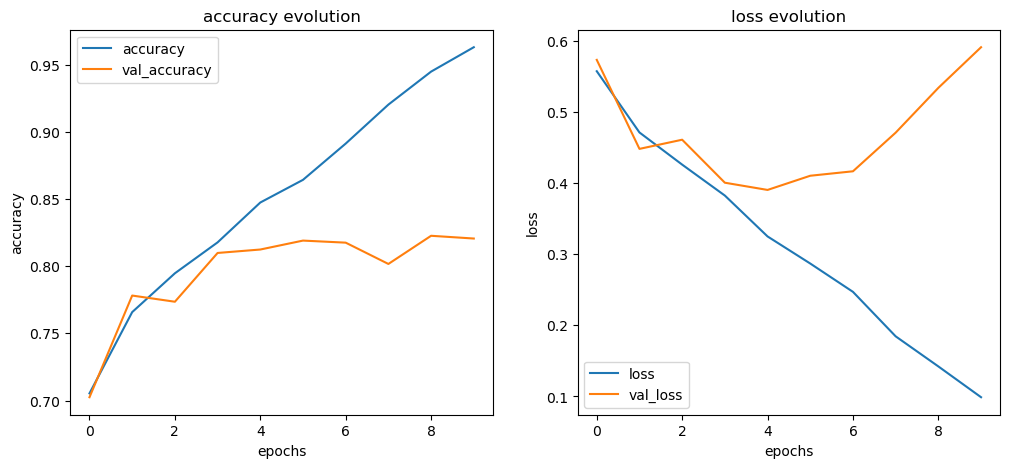

In [19]:
plot_figs(10,history_gender_7)

In [32]:
model_gender_8 = tf.keras.Sequential()
model_gender_8.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(200, 200, 1)))
model_gender_8.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model_gender_8.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))
model_gender_8.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
model_gender_8.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
model_gender_8.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))
model_gender_8.add(tf.keras.layers.Conv2D(256, (3, 3), activation='relu'))
model_gender_8.add(tf.keras.layers.Conv2D(256, (3, 3), activation='relu'))
model_gender_8.add(tf.keras.layers.Conv2D(256, (3, 3), activation='relu'))
model_gender_8.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))
model_gender_8.add(tf.keras.layers.Flatten())
model_gender_8.add(tf.keras.layers.Dense(4096, activation='relu'))
model_gender_8.add(tf.keras.layers.Dense(2048, activation='relu'))
model_gender_8.add(tf.keras.layers.Dense(1, activation='sigmoid'))  
model_gender_8.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [33]:
history_gender_8=model_gender_8.fit(x_train, y_train,batch_size=32, epochs=epochs,validation_data=(x_test, y_test),callbacks=[callback])

Epoch 1/20
245/245 [==============================] - 48s 165ms/step - loss: 1.0026 - accuracy: 0.5548 - val_loss: 0.6337 - val_accuracy: 0.6053
Epoch 2/20
245/245 [==============================] - 37s 153ms/step - loss: 0.5785 - accuracy: 0.6911 - val_loss: 0.4789 - val_accuracy: 0.7612
Epoch 3/20
245/245 [==============================] - 37s 153ms/step - loss: 0.4616 - accuracy: 0.7643 - val_loss: 0.4393 - val_accuracy: 0.7786
Epoch 4/20
245/245 [==============================] - 37s 153ms/step - loss: 0.4085 - accuracy: 0.7988 - val_loss: 0.4792 - val_accuracy: 0.7740
Epoch 5/20
245/245 [==============================] - 37s 153ms/step - loss: 0.3713 - accuracy: 0.8172 - val_loss: 0.3873 - val_accuracy: 0.8139
Epoch 6/20
245/245 [==============================] - 38s 154ms/step - loss: 0.3304 - accuracy: 0.8403 - val_loss: 0.3751 - val_accuracy: 0.8093
Epoch 7/20
245/245 [==============================] - 37s 153ms/step - loss: 0.2909 - accuracy: 0.8646 - val_loss: 0.4106 - val_ac

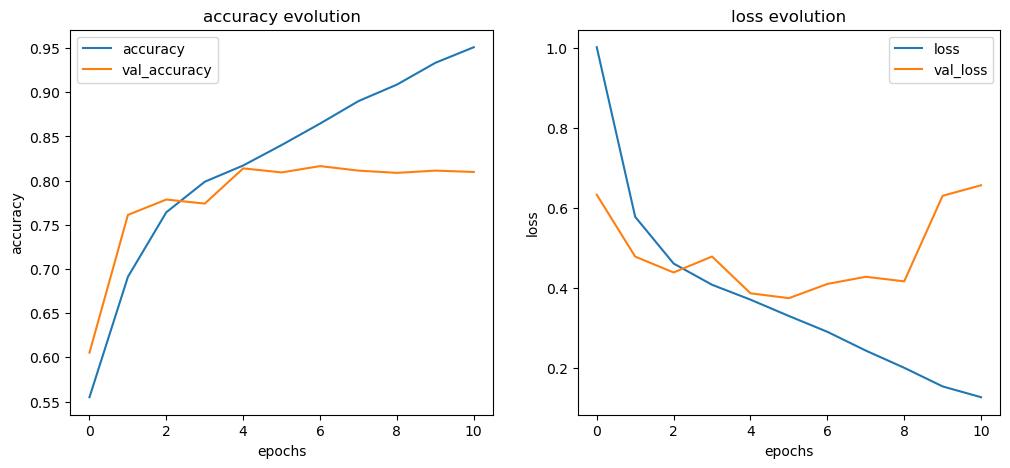

In [34]:
plot_figs(11,history_gender_8)